In [1]:
import xml.etree.cElementTree as ET
import nltk
from functools import reduce
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns
from scipy.stats import norm
import numpy
import math
from matplotlib.ticker import ScalarFormatter 
import random
import word2vec
import os
import pickle

1)

In [2]:
def tokenize(text, remove_stopwords=True, allowed_words = [], lemat=False):
    stopWords = set(stopwords.words('english'))|set(["''",",''",".''",".,'","...",".,",'``','--'])
    tokens = nltk.wordpunct_tokenize(text)
    tokens = [word.lower() for word in tokens if len(word) > 1]
    tokens = [word for word in tokens if (not (word in stopWords and remove_stopwords) or word in allowed_words)
              and not word.isdigit()]
    
    if lemat:
        porter_stemmer = PorterStemmer()
        tokens = [porter_stemmer.stem(word) for word in tokens]
    return tokens

In [3]:
root = ET.ElementTree(file='ap/ap.xml').getroot()

news_dic = {}
full_text = []
for node in root:
    docno, text = node
    news_dic[docno.text.strip()] = text.text

full_text = ''.join([v for k,v in news_dic.items()])

In [4]:
tokens = tokenize(full_text)
fd = nltk.FreqDist(tokens)
most_common_s = set(sorted(fd, key=lambda x: fd[x],reverse=True)[:500])
most_common_s

{'according',
 'accused',
 'across',
 'action',
 'added',
 'administration',
 'africa',
 'agency',
 'ago',
 'agreed',
 'agreement',
 'aid',
 'air',
 'allowed',
 'along',
 'already',
 'also',
 'although',
 'america',
 'american',
 'americans',
 'among',
 'analysts',
 'announced',
 'another',
 'anti',
 'april',
 'area',
 'army',
 'around',
 'arrested',
 'asked',
 'association',
 'attack',
 'attorney',
 'authorities',
 'average',
 'away',
 'back',
 'bank',
 'based',
 'become',
 'began',
 'believe',
 'best',
 'better',
 'bid',
 'big',
 'bill',
 'billion',
 'black',
 'board',
 'british',
 'budget',
 'building',
 'bush',
 'business',
 'california',
 'call',
 'called',
 'came',
 'campaign',
 'capital',
 'care',
 'case',
 'center',
 'central',
 'cents',
 'chairman',
 'change',
 'charged',
 'charges',
 'chief',
 'children',
 'church',
 'city',
 'close',
 'closed',
 'co',
 'come',
 'commission',
 'committee',
 'communist',
 'community',
 'companies',
 'company',
 'computer',
 'condition',
 'conf

In [5]:
window_size = 5
bgm    = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_words(tokens, window_size)
finder.apply_ngram_filter(lambda w1, w2: w1 not in most_common_s or w2 not in most_common_s)
scored = finder.score_ngrams( bgm.pmi  )
scored

[(('yen', 'yen'), 8.28347572156104),
 (('prime', 'minister'), 7.841320964359447),
 (('human', 'rights'), 7.732229466436873),
 (('interest', 'rates'), 7.544580880067873),
 (('south', 'africa'), 7.431044075757306),
 (('telephone', 'interview'), 7.396305178550765),
 (('iraq', 'kuwait'), 7.368857763927906),
 (('dollar', 'yen'), 7.311175236306227),
 (('health', 'care'), 7.204085347788984),
 (('eastern', 'europe'), 7.150263561721452),
 (('cents', 'cents'), 7.113865497231174),
 (('stock', 'exchange'), 7.068001960869097),
 (('average', 'points'), 7.044292578142056),
 (('executive', 'officer'), 7.018083086035242),
 (('gold', 'bid'), 6.893186135353387),
 (('michael', 'dukakis'), 6.7744539541964315),
 (('west', 'german'), 6.743658039398806),
 (('yen', 'london'), 6.734715586371227),
 (('news', 'conference'), 6.714001996955698),
 (('exchange', 'index'), 6.708035633204926),
 (('chief', 'executive'), 6.684488609065767),
 (('district', 'judge'), 6.681065496966479),
 (('stock', 'index'), 6.658079111305

2)

In [6]:
orig_species_f = open('ap/pg1228.txt', 'r')
inputfile = orig_species_f.read()
tokens_orig = tokenize(inputfile, False, allowed_words = ['for'])

In [7]:
#nltk.draw.dispersion.dispersion_plot(tokens_orig,['plant','instinct','for'])

In [8]:
def get_apps_for_word_in_text(aWord, aText):
    return [i for i,word in enumerate(aText) if word == '{}'.format(aWord)]

instinct_app = get_apps_for_word_in_text('instinct', tokens_orig)
plant_app = get_apps_for_word_in_text('plant', tokens_orig)
for_app = get_apps_for_word_in_text('for', tokens_orig)

total_words = len(tokens_orig)

Para que termine usamos un salto cada 10 palabras.
Lo siguiente lo corrimos y guardamos en el dir "ap/guassian_sum_calc/*.out".

In [9]:
## rowo is an acronym of "rate of word occurrency"
rowo_instinct = []
rowo_plant = []
rowo_for = []

In [10]:
## Read files
for _rowo,_word in [(rowo_instinct,'instict'),(rowo_plant,'plant'),(rowo_for,'for')]:
    with open('ap/gaussian_sum_calc/{}.out'.format(_word),'rb') as fp:
        _rowo.extend(pickle.load(fp))

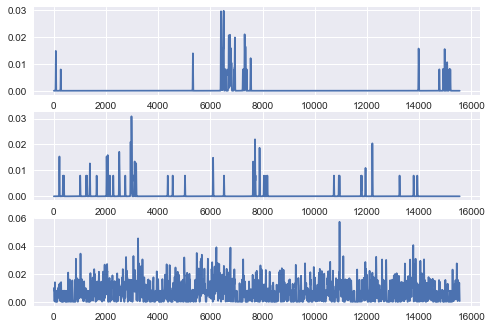

In [11]:
sns.plt.subplot(311)
sns.plt.plot(rowo_instinct)
sns.plt.subplot(312)
sns.plt.plot(rowo_plant)
sns.plt.subplot(313)
sns.plt.plot(rowo_for)
sns.plt.show()

In [12]:
def autocorrelacion(_row):
    pwt_avg = sum([ _row[pos] for pos in range(len(_row)) ]) / len(_row)
    cociente = pwt_avg**2 + sum([ _row[pos]**2 for pos in range(len(_row)) ]) / len(_row)

    taus = []

    for tau in range(1000):
        pwt_tau_avg = sum([ _row[pos]*_row[pos+tau] for pos in range(0,len(_row)-tau)]) / (len(_row)-tau)
        taus.append(pwt_tau_avg - pwt_avg * (sum([_row[pos+tau] for pos in range(0,len(_row)-tau)]) / (len(_row)-tau)))
        taus[tau] /= cociente
    return taus

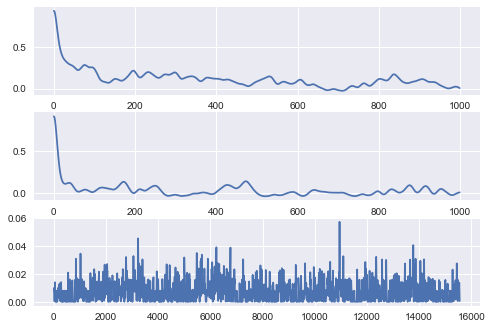

In [13]:
auto_rowo_instinct = autocorrelacion(rowo_instinct)
sns.plt.subplot(311)
sns.plt.plot(auto_rowo_instinct)

auto_rowo_plant = autocorrelacion(rowo_plant)
sns.plt.subplot(312)
sns.plt.plot(auto_rowo_plant)

auto_rowo_for = autocorrelacion(rowo_for)
sns.plt.subplot(313)
sns.plt.plot(rowo_for)

sns.plt.show()

In [14]:
fd_orig = nltk.FreqDist(tokens_orig)
salto = len(fd_orig)//1000
elegidas = dict()
fd_orig_s = sorted(fd_orig, key=lambda x: fd_orig[x],reverse=True)[:100]
fd_orig_s
for e in fd_orig_s:
        elegidas[e] = fd_orig[e]

elegidas

{'all': 575,
 'an': 510,
 'and': 4507,
 'animals': 297,
 'any': 551,
 'are': 1155,
 'as': 1602,
 'at': 704,
 'be': 1675,
 'been': 931,
 'being': 284,
 'believe': 216,
 'between': 339,
 'but': 867,
 'by': 1377,
 'can': 527,
 'case': 282,
 'cases': 226,
 'conditions': 222,
 'could': 235,
 'different': 286,
 'distinct': 257,
 'do': 257,
 'during': 219,
 'each': 550,
 'even': 212,
 'far': 200,
 'first': 201,
 'for': 1149,
 'forms': 403,
 'from': 1147,
 'genera': 220,
 'great': 262,
 'had': 244,
 'has': 613,
 'have': 1767,
 'having': 253,
 'how': 231,
 'if': 435,
 'in': 4073,
 'is': 1444,
 'it': 1069,
 'its': 416,
 'life': 307,
 'long': 245,
 'many': 453,
 'may': 524,
 'more': 580,
 'most': 407,
 'much': 232,
 'must': 243,
 'natural': 382,
 'nature': 262,
 'new': 256,
 'no': 333,
 'not': 891,
 'now': 233,
 'number': 205,
 'of': 7972,
 'often': 201,
 'on': 1568,
 'one': 646,
 'only': 267,
 'or': 1268,
 'other': 767,
 'our': 284,
 'period': 245,
 'plants': 335,
 'same': 793,
 'see': 273,
 'se

In [15]:
def freq_in_partition(w,p,p_total,text):
    desde = p*(len(text)//p_total)
    hasta = (p+1)*(len(text)//p_total)
    tot = 0
    for wt in text[desde:hasta]:
        if w==wt:
            tot += 1
    return tot

particiones = 64
entropias_orig = dict()
for w,freq in elegidas.items():
    entropia_w = 0
    for p in range(particiones):
        prob = freq_in_partition(w,p,particiones,tokens_orig)/freq
        if prob != 0:
            entropia_w += prob*(math.log(prob,2))
    entropia_w = -1*entropia_w
    entropias_orig[w] = entropia_w


tokens_shuffled = tokens_orig.copy()
random.shuffle(tokens_shuffled)
entropias_random = dict()
for w,freq in elegidas.items():
    entropia_w = 0
    for p in range(particiones):
        prob = freq_in_partition(w,p,particiones,tokens_shuffled)/freq
        if prob != 0:
            entropia_w += prob*(math.log(prob,2))
    entropia_w = -1*entropia_w
    entropias_random[w] = entropia_w

entropias_orig
entropias_random

{'all': 5.925693528611517,
 'an': 5.892926749588385,
 'and': 5.989520665942476,
 'animals': 5.836044861039159,
 'any': 5.91858523393773,
 'are': 5.9589837239028665,
 'as': 5.962074797202368,
 'at': 5.941644900507327,
 'be': 5.976800663162929,
 'been': 5.946810997038864,
 'being': 5.771165380019995,
 'believe': 5.7448214159568165,
 'between': 5.85008584734103,
 'but': 5.942703760013774,
 'by': 5.9544434344720605,
 'can': 5.919972959831563,
 'case': 5.8601013975954706,
 'cases': 5.820405169447812,
 'conditions': 5.74342554289646,
 'could': 5.833233134917545,
 'different': 5.783559059254836,
 'distinct': 5.838154832548862,
 'do': 5.7993066318912865,
 'during': 5.808102448678958,
 'each': 5.892771875533743,
 'even': 5.720295269774484,
 'far': 5.779788943270428,
 'first': 5.744693595271166,
 'for': 5.961419165809166,
 'forms': 5.8961391255162905,
 'from': 5.966134180958137,
 'genera': 5.775300826270653,
 'great': 5.865567436232204,
 'had': 5.7571241918275895,
 'has': 5.929440187743679,
 'ha

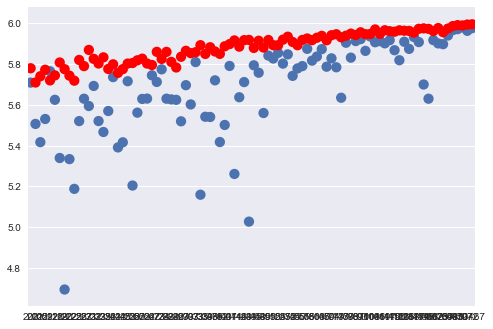

In [16]:
frequencies = []
entropies = []
entropies_shuff = []
for w,freq in elegidas.items():
    frequencies.append(freq)
    entropies.append(entropias_orig[w])
    entropies_shuff.append(entropias_random[w])

h = sns.pointplot(x=frequencies,y=entropies, join = False, ci = None)
g = sns.pointplot(x=frequencies,y=entropies_shuff, join = False, ci = None, color="red")
sns.mpl.rc("figure", figsize=(15,10))
sns.plt.show()

In [17]:
from gensim import corpora, models, similarities
dictionary = corpora.Dictionary(news_dic.values())
lsi = models.LsiModel([dictionary.doc2bow(text) for text in news_dic.values()], id2word=dictionary, num_topics=4)

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [ ]:
def to_lsi(word):
    vec_bow = dictionary.doc2bow(word.lower())
    return lsi[vec_bow] # convert the query to LSI space 
lsi.print_topics(5)

In [ ]:
model = models.Word2Vec(news_dic.values(), size=15, window=20, min_count=5, workers=4)

In [ ]:
word_sim_f = open('wordsim353_sim_rel/wordsim_similarity_goldstandard.txt')
error = 0
for line in word_sim_f:
    w1, w2, v2 = line.split()
    if w1 in model.wv.vocab and w2 in model.wv.vocab:
        v2 = float(v2)
        v1 = model.wv.similarity(w1, w2)*10
        epsilon = (v1-v2)**2
        error += epsilon
    print(w1,w2,v1,v2,epsilon)

error